<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/Text_Classification_With_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Text Classification With Sklearn

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("airline_tweets.csv")

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: xlabel='airline_sentiment', ylabel='count'>

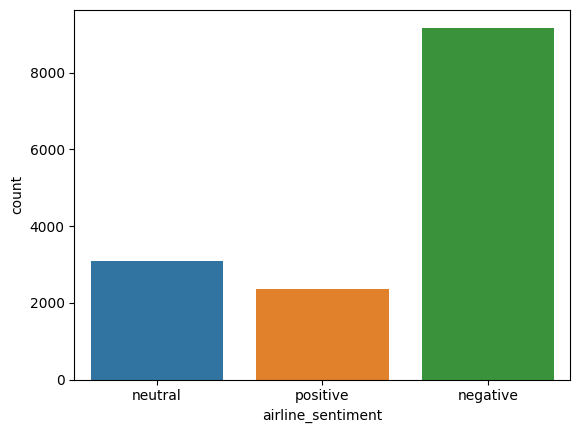

In [4]:
sns.countplot(data=df, x="airline_sentiment")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bad Flight'),
  Text(1, 0, "Can't Tell"),
  Text(2, 0, 'Late Flight'),
  Text(3, 0, 'Customer Service Issue'),
  Text(4, 0, 'Flight Booking Problems'),
  Text(5, 0, 'Lost Luggage'),
  Text(6, 0, 'Flight Attendant Complaints'),
  Text(7, 0, 'Cancelled Flight'),
  Text(8, 0, 'Damaged Luggage'),
  Text(9, 0, 'longlines')])

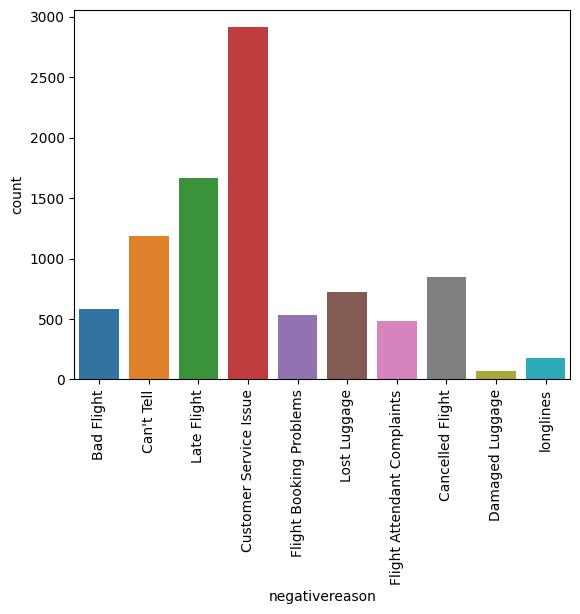

In [9]:
sns.countplot(data=df, x="negativereason")
plt.xticks(rotation=90)

<Axes: xlabel='airline', ylabel='count'>

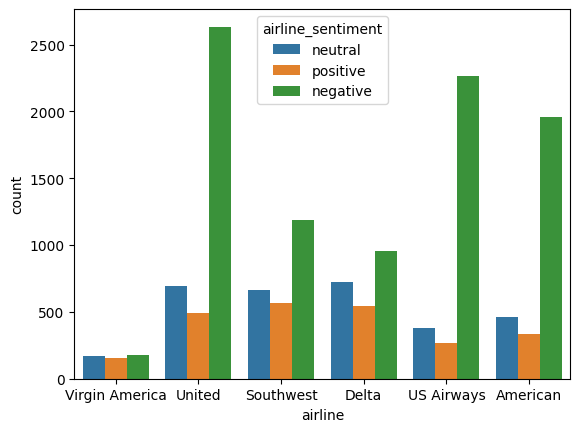

In [10]:
sns.countplot(data=df, x="airline", hue="airline_sentiment")

In [11]:
X = df["text"]

In [12]:
y = df["airline_sentiment"]

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer(stop_words="english")

In [20]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [23]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

##Naive Bayes Classifier

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

##LogisticRegression

In [27]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

##SVM

In [28]:
from sklearn.svm import SVC, LinearSVC

In [29]:
svc_model = SVC()
svc_model.fit(X_train_tfidf, y_train)

SVC()

In [30]:
lsvc_model = LinearSVC()
lsvc_model.fit(X_train_tfidf, y_train)

LinearSVC()

##Compare Classification Models

In [31]:
from sklearn.metrics import classification_report

In [32]:
def report(model):
  preds = model.predict(X_test_tfidf)
  print(classification_report(y_test, preds))

In [33]:
report(nb_model)

              precision    recall  f1-score   support

    negative       0.68      0.99      0.81      2814
     neutral       0.75      0.14      0.23       884
    positive       0.94      0.18      0.30       694

    accuracy                           0.69      4392
   macro avg       0.79      0.44      0.45      4392
weighted avg       0.74      0.69      0.61      4392



In [36]:
report(lr_model)

              precision    recall  f1-score   support

    negative       0.81      0.93      0.87      2814
     neutral       0.65      0.48      0.55       884
    positive       0.80      0.60      0.69       694

    accuracy                           0.79      4392
   macro avg       0.76      0.67      0.70      4392
weighted avg       0.78      0.79      0.78      4392



In [37]:
report(svc_model)

              precision    recall  f1-score   support

    negative       0.80      0.95      0.87      2814
     neutral       0.69      0.42      0.52       884
    positive       0.81      0.60      0.69       694

    accuracy                           0.79      4392
   macro avg       0.77      0.66      0.69      4392
weighted avg       0.78      0.79      0.77      4392



In [38]:
report(lsvc_model)

              precision    recall  f1-score   support

    negative       0.84      0.91      0.87      2814
     neutral       0.62      0.51      0.56       884
    positive       0.76      0.65      0.70       694

    accuracy                           0.79      4392
   macro avg       0.74      0.69      0.71      4392
weighted avg       0.78      0.79      0.78      4392

